Sales Breakdown by Discount Range Scenario: The Marketing Team wants to understand the impact of different discount ranges on sales. Requirements: • Create a calculated field that segments discounts into categories: o No Discount: discount_amount = 0 o Low Discount: discount_amount < 10 o Medium Discount: discount_amount between 10 and 20 o High Discount: discount_amount > 20 • Create a bar chart that shows the sales (SUM(before_discount)) for each discount category. Key Features to Use: • discount_amount • before_discount

📊 Sales Breakdown by Discount Range:
  discount_range  before_discount
0  High Discount     3.781727e+08
1   Low Discount     3.477100e+05
2    No Discount     8.201285e+09


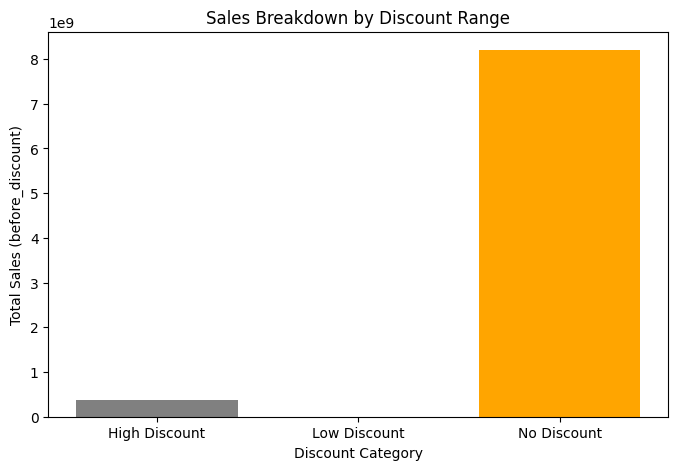

In [1]:
# 📌 Task: Sales Breakdown by Discount Range

import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load dataset
file_path = r"C:\Users\bhave\OneDrive\Desktop\dashboard\dataset2\finaldataset.csv"
df = pd.read_csv(file_path)

# Step 2: Ensure discount column is numeric
df['discount_amount'] = pd.to_numeric(df['discount_amount'], errors='coerce')
df['before_discount'] = pd.to_numeric(df['before_discount'], errors='coerce')

# Step 3: Create discount category
def discount_category(x):
    if x == 0:
        return "No Discount"
    elif x < 10:
        return "Low Discount"
    elif 10 <= x <= 20:
        return "Medium Discount"
    else:
        return "High Discount"

df['discount_range'] = df['discount_amount'].apply(discount_category)

# Step 4: Aggregate sales by discount category
discount_sales = df.groupby('discount_range', as_index=False)['before_discount'].sum()

# Step 5: Display results
print("📊 Sales Breakdown by Discount Range:")
print(discount_sales)

# Step 6: Visualization
plt.figure(figsize=(8,5))
plt.bar(discount_sales['discount_range'], discount_sales['before_discount'], color=['gray','lightblue','orange','red'])
plt.title("Sales Breakdown by Discount Range")
plt.ylabel("Total Sales (before_discount)")
plt.xlabel("Discount Category")
plt.show()
